In [1]:
import pandas as pd
import numpy as np
import seaborn as sb #
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os

nypd_df1 = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')
nypd_df1.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,220756993,11/19/2020,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,B,41,0,18-24,M,BLACK,1013232,236725,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
1,220422940,11/12/2020,157.0,RAPE 1,104.0,RAPE,PL 1303502,F,Q,112,0,25-44,M,BLACK,1025420,202485,40.722364,-73.851474,POINT (-73.85147389399998 40.72236368700004)
2,218804160,10/06/2020,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,M,7,2,25-44,M,BLACK,988708,200317,40.716508,-73.983920,POINT (-73.98391989899994 40.71650772200008)
3,218641095,10/02/2020,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631600,F,M,5,0,25-44,M,WHITE,984946,200203,40.716196,-73.997491,POINT (-73.99749074599998 40.716195914000025)
4,217890704,09/16/2020,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,K,77,0,25-44,M,WHITE HISPANIC,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)


In [2]:
nypd_df1.columns.values

array(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD',
       'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO',
       'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX',
       'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'New Georeferenced Column'], dtype=object)

In [3]:
nypd_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140413 entries, 0 to 140412
Data columns (total 19 columns):
ARREST_KEY                  140413 non-null int64
ARREST_DATE                 140413 non-null object
PD_CD                       140390 non-null float64
PD_DESC                     140376 non-null object
KY_CD                       140376 non-null float64
OFNS_DESC                   140376 non-null object
LAW_CODE                    140413 non-null object
LAW_CAT_CD                  139024 non-null object
ARREST_BORO                 140413 non-null object
ARREST_PRECINCT             140413 non-null int64
JURISDICTION_CODE           140413 non-null int64
AGE_GROUP                   140413 non-null object
PERP_SEX                    140413 non-null object
PERP_RACE                   140413 non-null object
X_COORD_CD                  140413 non-null int64
Y_COORD_CD                  140413 non-null int64
Latitude                    140413 non-null float64
Longitude               

In [4]:
nypd_df1.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                         23
PD_DESC                       37
KY_CD                         37
OFNS_DESC                     37
LAW_CODE                       0
LAW_CAT_CD                  1389
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

Hmm looks like we have 5 columns with many null values. Here are the descriptions for those columns according to NYC OpenData (source of data set):


*PD_CD - Three digit internal classification code (more granular than Key Code)

*PD_DESC - Description of internal classification corresponding with PD code (more granular than Offense Description)

*KY_CD - Three digit internal classification code (more general category than PD code)

*OFNS_DESC - Description of internal classification corresponding with KY code (more general category than PD description)

*LAW_CAT_CD - Level of offense: felony, misdemeanor, violation


We should keep LAW_CAT_CD and OFNS_DESC since they look important for this analysis. The other 3 columns will be dropped since they seem to have more meaning to internal users. Also I will get rid of ARREST_KEY because it is likely a primary key for a table and not needed for our analysis. LAW_CODE will also be removed since it appears to be a code familiar to internal users but not needed for analysis.   

In [5]:
columns_dropped = ['ARREST_KEY', 'PD_CD', 'KY_CD', 'LAW_CODE']
nypd_df1.drop(columns = columns_dropped, inplace = True)
nypd_df1.isnull().sum()

ARREST_DATE                    0
PD_DESC                       37
OFNS_DESC                     37
LAW_CAT_CD                  1389
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [6]:
impute_values = {'PD_DESC': 'UNKNOWN', 'OFNS_DESC': 'UNKNOWN'}
nypd_df1.fillna(value=impute_values, inplace = True)
nypd_df1.isnull().sum()

ARREST_DATE                    0
PD_DESC                        0
OFNS_DESC                      0
LAW_CAT_CD                  1389
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [7]:
PD_DESC_na = nypd_df1.loc[nypd_df1['PD_DESC'] == 'UNKNOWN'] #check if imputed values were inserted 
PD_DESC_na

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
6,07/10/2020,UNKNOWN,UNKNOWN,M,M,17,0,45-64,M,WHITE,992062,212078,40.748786,-73.971807,POINT (-73.97180720699998 40.748786457000044)
374,11/11/2020,UNKNOWN,UNKNOWN,M,Q,110,0,25-44,M,BLACK HISPANIC,1022285,212504,40.749877,-73.862727,POINT (-73.86272726099996 40.74987737400005)
2210,12/12/2020,UNKNOWN,UNKNOWN,F,M,23,0,25-44,M,WHITE HISPANIC,999998,226211,40.787567,-73.943132,POINT (-73.94313233199995 40.78756730100001)
2898,11/22/2020,UNKNOWN,UNKNOWN,M,K,62,0,18-24,M,WHITE HISPANIC,981698,159955,40.605724,-74.009192,POINT (-74.00919211099993 40.60572368600003)
3589,11/18/2020,UNKNOWN,UNKNOWN,M,M,26,2,25-44,M,WHITE HISPANIC,996660,235153,40.812116,-73.955170,POINT (-73.95516997799997 40.81211596800006)
7377,12/21/2020,UNKNOWN,UNKNOWN,M,K,90,0,25-44,F,BLACK HISPANIC,995211,196560,40.706190,-73.960467,POINT (-73.96046744599995 40.70618998300005)
8984,11/12/2020,UNKNOWN,UNKNOWN,M,M,13,0,25-44,M,BLACK HISPANIC,989865,209425,40.741506,-73.979739,POINT (-73.97973860099995 40.741506303000044)
9166,12/21/2020,UNKNOWN,UNKNOWN,F,Q,114,0,25-44,M,WHITE,1007694,219657,40.769561,-73.915363,POINT (-73.91536344699995 40.76956124200007)
13506,12/03/2020,UNKNOWN,UNKNOWN,F,B,44,0,25-44,M,BLACK,1006195,240321,40.826282,-73.920708,POINT (-73.92070763799995 40.82628213200008)
18524,11/22/2020,UNKNOWN,UNKNOWN,M,K,62,0,<18,M,WHITE HISPANIC,981698,159955,40.605724,-74.009192,POINT (-74.00919211099993 40.60572368600003)


In [8]:
impute_LAW_CAT = {'LAW_CAT_CD': 'U'}
nypd_df1.fillna(value=impute_LAW_CAT, inplace = True)
nypd_df1.isnull().sum()

ARREST_DATE                 0
PD_DESC                     0
OFNS_DESC                   0
LAW_CAT_CD                  0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64

In [9]:
LAW_CAT_na = nypd_df1.loc[nypd_df1['LAW_CAT_CD'] == 'U'] 
LAW_CAT_na.head() # I won't print full list since I expect 

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
65,12/23/2020,U.S. CODE UNCLASSIFIED,FOR OTHER AUTHORITIES,U,Q,113,0,25-44,F,BLACK,1039225,181937,40.665889,-73.801838,POINT (-73.80183792699995 40.665889305000064)
89,12/30/2020,U.S. CODE UNCLASSIFIED,FOR OTHER AUTHORITIES,U,B,52,0,25-44,M,BLACK,1017440,256046,40.869407,-73.879998,POINT (-73.87999831299999 40.86940749200004)
107,12/16/2020,U.S. CODE UNCLASSIFIED,FOR OTHER AUTHORITIES,U,M,5,0,45-64,F,WHITE,983375,199718,40.714865,-74.003158,POINT (-74.00315779599998 40.71486468900008)
121,12/08/2020,U.S. CODE UNCLASSIFIED,FOR OTHER AUTHORITIES,U,K,84,0,25-44,M,BLACK,987042,193563,40.697970,-73.989933,POINT (-73.98993253599998 40.697970267000066)
280,12/10/2020,U.S. CODE UNCLASSIFIED,FOR OTHER AUTHORITIES,U,M,5,0,25-44,M,BLACK,983673,199405,40.714006,-74.002083,POINT (-74.00208280699997 40.71400560300003)


In [10]:
renamed_columns = {'PD_DESC': 'PD_Crime_Name', 'OFNS_DESC': 'OFFENSE', 'LAW_CAT_CD': 'Classification'}
nypd_df1.rename(columns= renamed_columns, inplace = True)
nypd_df1.columns.values

array(['ARREST_DATE', 'PD_Crime_Name', 'OFFENSE', 'Classification',
       'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP',
       'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'New Georeferenced Column'], dtype=object)

Text(0.5, 1.0, '% of arrests by sex')

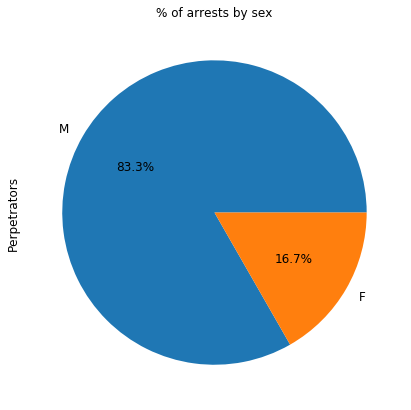

In [11]:
ax = (nypd_df1['PERP_SEX'].value_counts()*100.0 /len(nypd_df1))\
.plot.pie(autopct='%.1f%%', labels = ['M', 'F'],figsize =(7,7), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Perpetrators',fontsize = 12)
ax.set_title('% of arrests by sex', fontsize = 12)

Text(0.5, 1.0, '# of arrests by Classification')

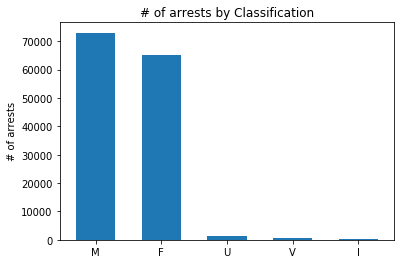

In [12]:
ax = nypd_df1['Classification'].value_counts().plot(kind = 'bar',rot = 0, width = 0.6)
ax.set_ylabel('# of arrests')
ax.set_title('# of arrests by Classification')

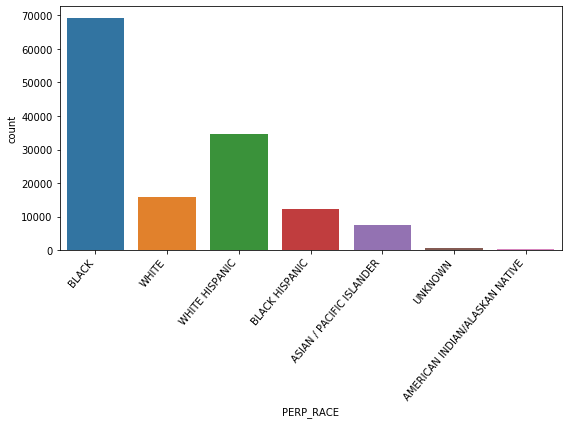

In [13]:
plt.figure(figsize=(8,6))
ax = sb.countplot(x="PERP_RACE", data=nypd_df1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

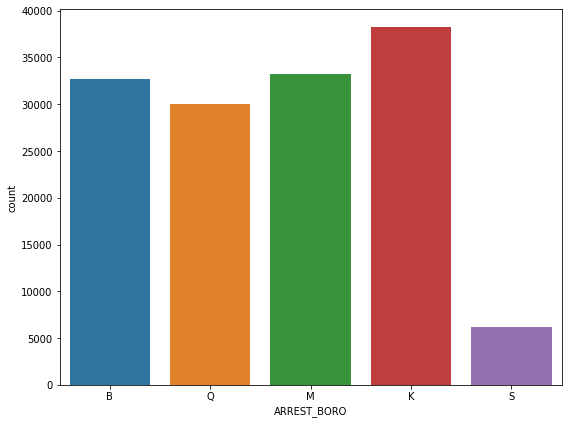

In [14]:
plt.figure(figsize=(8,6))
ax = sb.countplot(x="ARREST_BORO", data=nypd_df1)
plt.tight_layout()
plt.show()

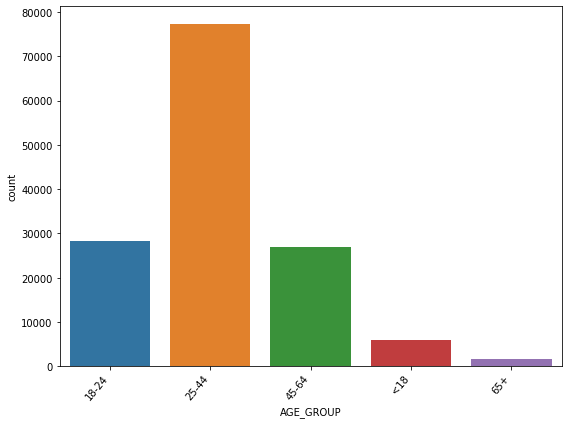

In [15]:
plt.figure(figsize=(8,6))
ax = sb.countplot(x="AGE_GROUP", data=nypd_df1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

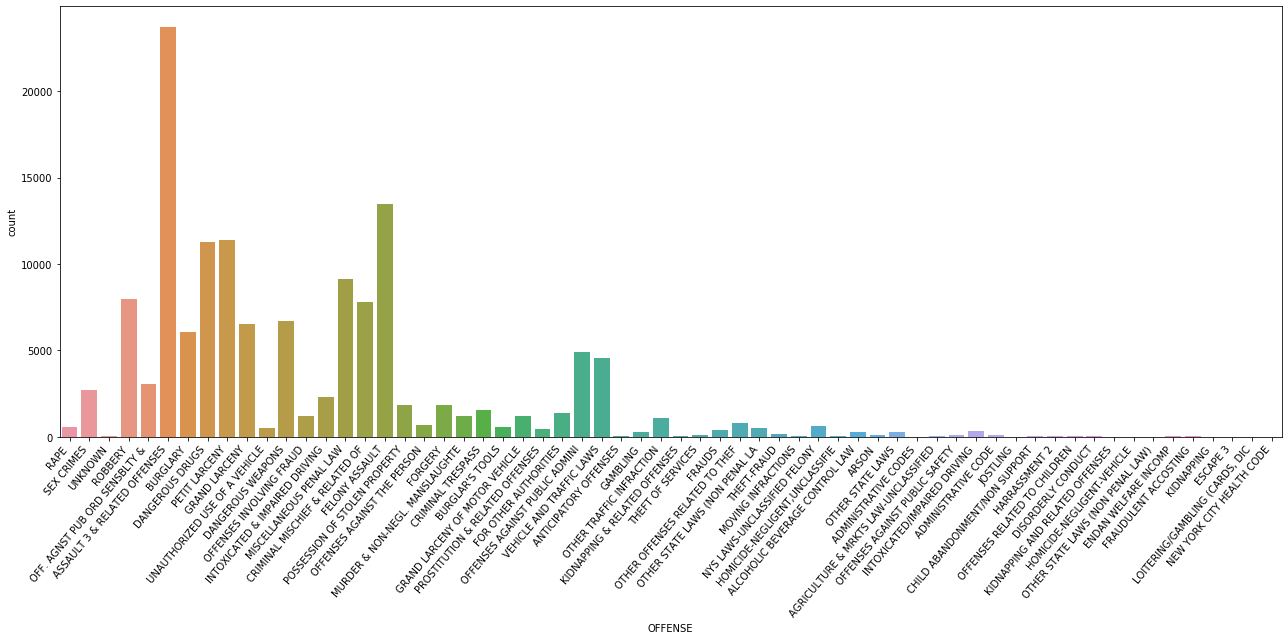

In [16]:
plt.figure(figsize=(18,9))
ax = sb.countplot(x="OFFENSE", data=nypd_df1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()